<a href="https://colab.research.google.com/github/CFathurrohman/Machine_learning/blob/main/Week3/ML_W3_TP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tugas Praktikum**


**Tugas 1: Multiple Linear Regression** <br>
Anda akan menggunakan dataset "Medical Cost Personal Datasets". Pastikan Anda telah mengunduh dataset ini.

Gunakan bahasa pemrograman Python dan library yang sesuai seperti NumPy, Pandas, Matplotlib dan Scikit-Learn untuk melakukan analisis regresi dan SVR.

 **Tugas 1: Multiple Linear Regression**
1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

3. Lakukan feature scaling jika diperlukan.

4. Buat model multiple linear regression menggunakan Scikit-Learn.

5. Latih model pada data latih dan lakukan prediksi pada data uji.

6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

**Catatan Tambahan:**<br>
Pastikan untuk memberikan penjelasan singkat tentang dataset yang digunakan, termasuk deskripsi variabel-variabel yang relevan.

Tampilkan visualisasi data yang relevan seperti scatter plot atau grafik lainnya jika diperlukan untuk pemahaman yang lebih baik.

Analisis hasil yang Anda dapatkan dalam tugas praktikum Anda.

In [ ]:
# Import Library yang Dibutuhkan
import numpy as np  # Library untuk komputasi numerik
import pandas as pd  # Library untuk manipulasi data dan analisis
import matplotlib.pyplot as plt  # Library untuk visualisasi data dalam bentuk plot
import seaborn as sns  # Library untuk visualisasi statistik dan pembuatan grafik
from sklearn.model_selection import train_test_split  # Untuk membagi dataset menjadi data latih dan uji
from sklearn.preprocessing import StandardScaler  # Untuk melakukan standarisasi fitur (scaling)
from sklearn.linear_model import LinearRegression  # Model regresi linier dari Scikit-learn
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error  # Metrik evaluasi performa model

In [ ]:
# Memuat Dataset
from google.colab import drive
drive.mount('/content/drive')  # Mount Google Drive agar dataset bisa diakses di Colab
data = pd.read_csv('/content/drive/MyDrive/Ml/W3/insurance.csv')  # Memuat dataset 'insurance.csv' dari drive


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Menampilkan deskripsi Data
print(data.info())  # Menampilkan informasi struktur dataset (
print(data.describe())  # Menampilkan statistik deskriptif dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max

Dataset yang digunakan adalah insurance.csv, yang memuat informasi mengenai biaya medis yang harus dibayar oleh individu berdasarkan beberapa faktor. Berikut adalah deskripsi variabel-variabel dalam dataset ini:

- age: Umur dari individu.<br>
- sex: Jenis kelamin dari individu  <br>
- bmi: Indeks Massa Tubuh (Body Mass Index), mengukur berat badan seseorang dalam kaitannya dengan tinggi badan.<br>
- children: Jumlah anak yang dimiliki oleh individu.<br>
- smoker: Apakah individu adalah perokok .<br>
- region: Wilayah tempat tinggal individu .<br>
- charges: Biaya medis yang dikenakan kepada individu.

In [ ]:
# Mengubah data kategorikal menjadi numerik
data['sex'] = data['sex'].map({'male': 0, 'female': 1})  # Mengonversi nilai 'male' ke 0 dan 'female' ke 1
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})  # Mengonversi nilai 'yes' ke 1 dan 'no' ke 0
data['region'] = data['region'].map({'northeast': 0, 'northwest': 1, 'southeast': 2, 'southwest': 3})  # Mengonversi region jadi angka
print(data.head())  # Menampilkan 5 baris pertama data setelah diubah menjadi numerik

   age  sex     bmi  children  smoker  region      charges
0   19    1  27.900         0       1       3  16884.92400
1   18    0  33.770         1       0       2   1725.55230
2   28    0  33.000         3       0       2   4449.46200
3   33    0  22.705         0       0       1  21984.47061
4   32    0  28.880         0       0       1   3866.85520


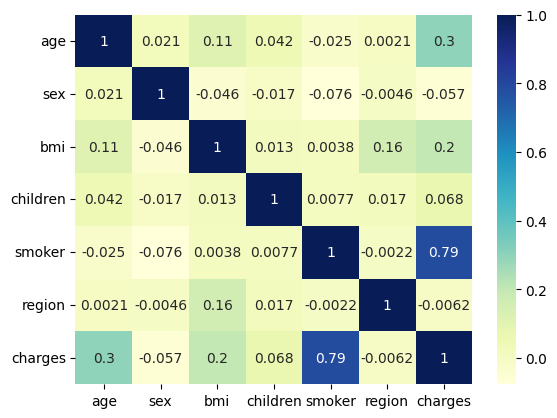

In [ ]:
# Visualisasi Data korelasi antar variabel menggunakan heatmap
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")  # Membuat heatmap untuk menampilkan korelasi antar variabel
plt.show()  # Menampilkan heatmap korelasi

1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

In [ ]:
# Langkah 1: Memisahkan Variabel Bebas (Fitur) dan Target
X = data[['smoker', 'bmi', 'age']]  # Hanya memilih kolom 'smoker', 'bmi', dan 'age'
y = data['charges']  # Variabel target, yaitu kolom 'charges

2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

In [ ]:
# Langkah 2: Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # Membagi dataset menjadi 70% data latih dan 30% data uji, dengan random_state untuk replikasi

3. Lakukan feature scaling jika diperlukan.

In [ ]:
# Langkah 3: Lakukan feature scaling jika diperlukan.
scaler = StandardScaler()  # Inisialisasi standard scaler untuk scaling fitur
X_train_scaled = scaler.fit_transform(X_train)  # Melakukan fitting dan scaling pada data latih
X_test_scaled = scaler.transform(X_test)  # Melakukan scaling pada data uji (tanpa fitting ulang)

In [ ]:
# Langkah 4: Buat model multiple linear regression menggunakan Scikit-Learn.
model = LinearRegression()  # Inisialisasi model regresi linier
model.fit(X_train_scaled, y_train)  # Melatih model menggunakan data latih yang telah di-scale

LinearRegression()

In [ ]:
# Langkah 5: Latih model pada data latih dan lakukan prediksi pada data uji.
y_pred = model.predict(X_test_scaled)  # Melakukan prediksi pada data uji menggunakan model yang telah dilatih

In [ ]:
# Langkah 6: Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.
r2 = r2_score(y_test, y_pred)  # Menghitung R-squared (koefisien determinasi)
mse = mean_squared_error(y_test, y_pred)  # Menghitung Mean Squared Error (MSE)
mae = mean_absolute_error(y_test, y_pred)  # Menghitung Mean Absolute Error (MAE)

# Menampilkan hasil evaluasi model
print(f'R-squared: {r2}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')

R-squared: 0.7655078324224212
Mean Squared Error (MSE): 34382251.77765593
Mean Absolute Error (MAE): 4203.579982683992


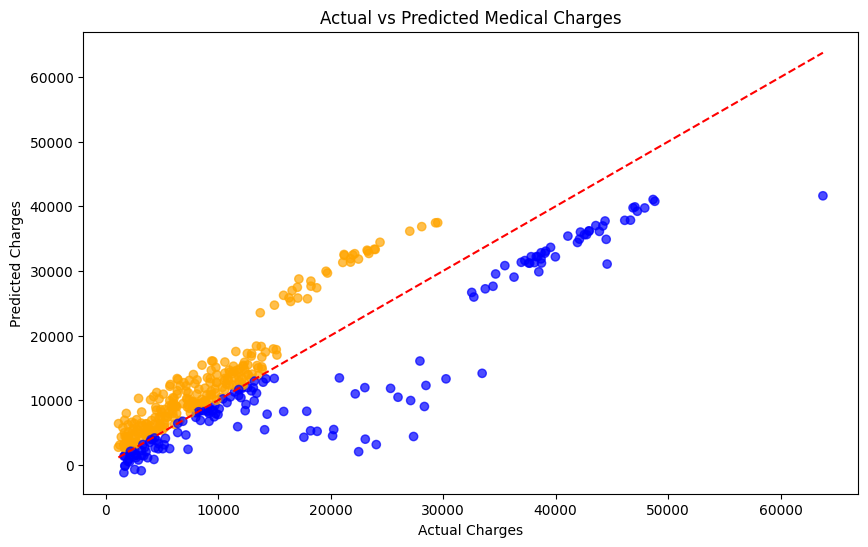

In [ ]:
# Visualisasi hasil prediksi dengan warna
plt.figure(figsize=(10, 6))  # Mengatur ukuran plot

# Membuat mask untuk memberikan warna berbeda pada hasil prediksi
colors = ['blue' if actual > predicted else 'orange' for actual, predicted in zip(y_test, y_pred)]

plt.scatter(y_test, y_pred, color=colors, alpha=0.7)  # Membuat scatter plot hasil prediksi vs aktual
plt.xlabel('Actual Charges')  # Label sumbu X
plt.ylabel('Predicted Charges')  # Label sumbu Y
plt.title('Actual vs Predicted Medical Charges')  # Judul plot

# Membuat garis diagonal (garis referensi) yang menandakan prediksi sempurna
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

plt.show()  # Menampilkan plot scatter dan garis referensi

Model multiple linear regression yang dibangun telah memberikan hasil yang cukup memuaskan dengan R² sebesar 76,55%, menunjukkan bahwa fitur-fitur seperti umur, jenis kelamin, BMI, jumlah anak, kebiasaan merokok, dan region cukup berpengaruh terhadap prediksi biaya medis. Namun, nilai MSE yang tinggi mengindikasikan adanya outliers atau data yang mungkin sulit diprediksi oleh model.